# Домашнє завдання до Теми 9. Задачі оптимізації

## Опис домашнього завдання

- Компанія виконує три види послуг, дохід від яких не однаковий, і через відсутність концентрації на найприбутковішому продукті недоотримує прибуток. Твоїм завданням є формулювання задачі оптимізації процесу розробки в компанії за нижченаведених умов.



- У процесі задіяні дизайнери, розробники та тестувальники. Дизайнерів у компанії двоє, фонд праці кожного — 160 годин роботи на місяць. Програмістів також двоє, проте їх загальний фонд праці — лише 192 години. Тестувальник один, але працює понаднормово — 180 годин.



- Компанія може створювати сайти, інтернет-магазини та інтеграції із ERP.
Вартість послуги розробки та час роботи спеціалістів за кожним видом робіт наступні:

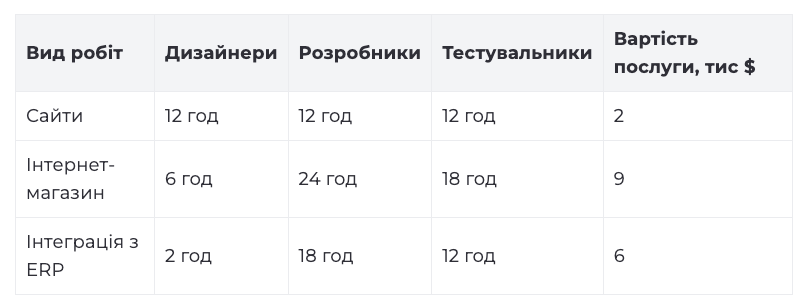

Знайди, які послуги вигідніше надавати для максимізації прибутку. Для цього:

- Сформуй цільову функцію доходу, виходячи з вартості послуг. За змінні візьми кількість робіт кожного виду.
- Запиши систему обмежень, виходячи з умов. Не забудь врахувати час роботи спеціалістів за кожним видом робіт, місячне навантаження спеціалістів та неможливість від’ємних значень.
- Знайди оптимальний розподіл послуг за допомогою бібліотеки SciPy так, як це робилось у конспекті.
- Знайди сумарний місячний дохід компанії при оптимальному розподілі функцій. Зроби висновки.

# Розв'язок

##1. Формулювання цільової функції
\
Нехай:
\
\begin{aligned}
x_1 & - \text{кількість розроблених сайтів} \\
x_2 & - \text{кількість розроблених інтернет-магазинів} \\
x_3 & - \text{кількість виконаних інтеграцій з ERP}
\end{aligned}


Цільова функція, яку потрібно максимізувати, буде доходом компанії. Вартість кожної послуги в тисячах доларів:

*  Сайт: 2000 USD
*  Інтернет-магазин: 9000 USD
*  Інтеграція з ERP: 6000 USD

Тоді цільова функція Z буде мати вигляд:

\begin{aligned}
\\
Z = 2x_1 + 9x_2 + 6x_3
\\
\end{aligned}









##2. Система обмежень

Тепер визначимо обмеження, які базуються на доступному робочому часі кожного типу спеціалістів.\
\
**Час роботи дизайнерів**:\
\
Кожен дизайнер має 160 годин, всього два дизайнери, отже 320 годин на місяць.\
Час роботи дизайнерів для кожного виду робіт:

*  Сайт: 12 годин
*  Інтернет-магазин: 6 годин
*  Інтеграція з ERP: 2 години

\begin{aligned}
\\
12x_1 + 6x_2 + 2x_3 ≤ 320
\\
\end{aligned}

**Час роботи розробників**:\
\
Два розробники, загальний фонд праці — 192 години на місяць. Час роботи розробників для кожного виду робіт:

*   Сайт: 12 годин
*   Інтернет-магазин: 24 години
*   Інтеграція з ERP: 18 годин

\begin{aligned}
\\
12x_1 + 24x_2 + 18x_3 ≤ 192
\\
\end{aligned}

**Час роботи тестувальників**:\
\
Один тестувальник, працює 180 годин на місяць. Час роботи тестувальника для кожного виду робіт:

*   Сайт: 12 годин
*   Інтернет-магазин: 18 години
*   Інтеграція з ERP: 12 годин

\begin{aligned}
\\
12x_1 + 18x_2 + 12x_3 ≤ 180
\\
\end{aligned}
\
**Додаткові обмеження**:\
\
Кількість виконаних робіт не може бути від'ємною:
\begin{aligned}
x_1 ≥ 0 \\
x_2 ≥ 0 \\
x_3 ≥ 0 \\
\end{aligned}

##3. Cкористаємося бібліотекою SciPy для розв'язання цієї задачі

In [1]:
import scipy.optimize as opt

# Коефіцієнти для цільової функції
c = [-2, -9, -6]  # негативні для мінімізації

# Коефіцієнти для обмежень
A = [
    [12, 6, 2],   # Обмеження по дизайнерах
    [12, 24, 18], # Обмеження по розробниках
    [12, 18, 12]  # Обмеження по тестувальниках
]

# Праві частини обмежень
b = [320, 192, 180]

# Межі змінних
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)

# Розв'язання задачі
res = opt.linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds], method='highs')

print('Статус:', res.message)
print('Оптимальна кількість сайтів:', res.x[0])
print('Оптимальна кількість інтернет-магазинів:', res.x[1])
print('Оптимальна кількість інтеграцій з ERP:', res.x[2])
print('Максимальний дохід:', -res.fun)  # негативний знак для максимізації


Статус: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Оптимальна кількість сайтів: 0.0
Оптимальна кількість інтернет-магазинів: 8.0
Оптимальна кількість інтеграцій з ERP: 0.0
Максимальний дохід: 72.0


# Порівняємо вирішення задачі за допомогою бібліотеки pulp

In [4]:
from pulp import LpMaximize, LpProblem, LpVariable

# Ініціалізуємо модель оптимізації
model = LpProblem(name="profit_maximization", sense=LpMaximize)

# Оголошуємо змінні
x1 = LpVariable(name="sites", lowBound=0, cat='Integer')
x2 = LpVariable(name="shops", lowBound=0, cat='Integer')
x3 = LpVariable(name="erp", lowBound=0, cat='Integer')

# Цільова функція
model += 2 * x1 + 9 * x2 + 6 * x3

# Обмеження
model += 12 * x1 + 6 * x2 + 2 * x3 <= 320
model += 12 * x1 + 24 * x2 + 18 * x3 <= 192
model += 12 * x1 + 18 * x2 + 12 * x3 <= 180

# Невід'ємність кількості послуг
model += x1 >= 0
model += x2 >= 0
model += x3 >= 0

# Розв'язуємо модель
model.solve()

# Виводимо результати
print(f"Optimal number of websites: {x1.varValue}")
print(f"Optimal number of online shops: {x2.varValue}")
print(f"Optimal number of ERP integrations: {x3.varValue}")

# Сумарний прибуток
total_profit = 2 * x1.varValue + 9 * x2.varValue + 6 * x3.varValue
print(f"Total monthly profit: ${total_profit}")


Optimal number of websites: 0.0
Optimal number of online shops: 8.0
Optimal number of ERP integrations: 0.0
Total monthly profit: $72.0


###4. Висновки
Для максимізації прибутку компанії найбільш вигідно зосередитися на наданні послуг з розробки інтернет-магазинів. При цьому не варто виконувати послуги зі створення сайтів та інтеграції з ERP, оскільки це не сприяє максимізації доходу при заданих обмеженнях по часу роботи спеціалістів.

Максимальний дохід, який компанія може отримати, становить 72 тис. доларів на місяць.

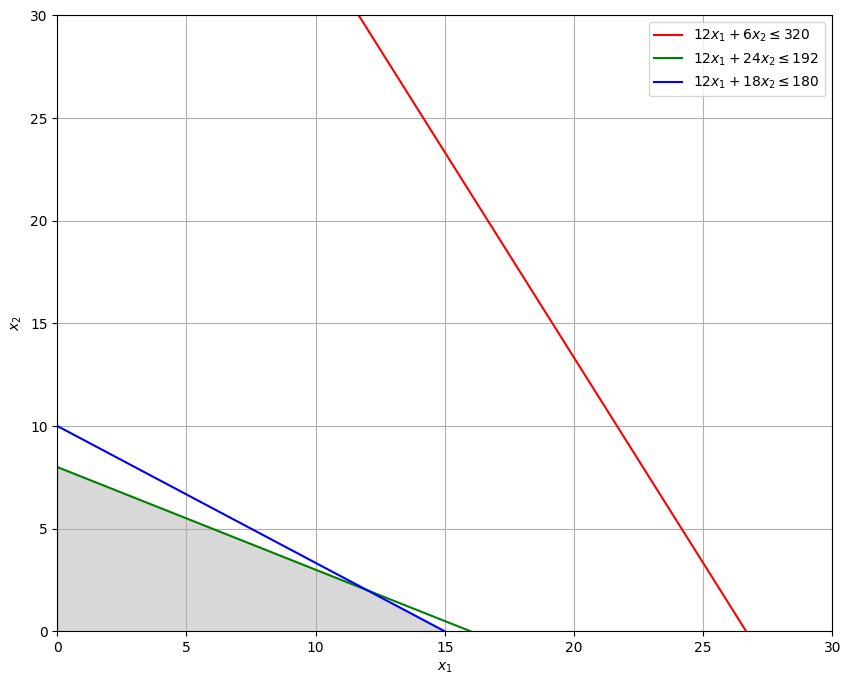

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Створюємо область визначення для x1 і x2
x1 = np.linspace(0, 30, 400)
x2_1 = (320 - 12 * x1) / 6
x2_2 = (192 - 12 * x1) / 24
x2_3 = (180 - 12 * x1) / 18

# Визначення області допустимих розв'язків
plt.figure(figsize=(10, 8))
plt.plot(x1, x2_1, label=r'$12x_1 + 6x_2 \leq 320$', color='red')
plt.plot(x1, x2_2, label=r'$12x_1 + 24x_2 \leq 192$', color='green')
plt.plot(x1, x2_3, label=r'$12x_1 + 18x_2 \leq 180$', color='blue')

# Заповнення області допустимих розв'язків
plt.fill_between(x1, 0, np.minimum(np.minimum(x2_1, x2_2), x2_3), color='gray', alpha=0.3)

# Встановлення меж графіку
plt.xlim((0, 30))
plt.ylim((0, 30))

# Підпис осей
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Додавання сітки
plt.grid(True)

# Додавання легенди
plt.legend()

# Показ графіку
plt.show()



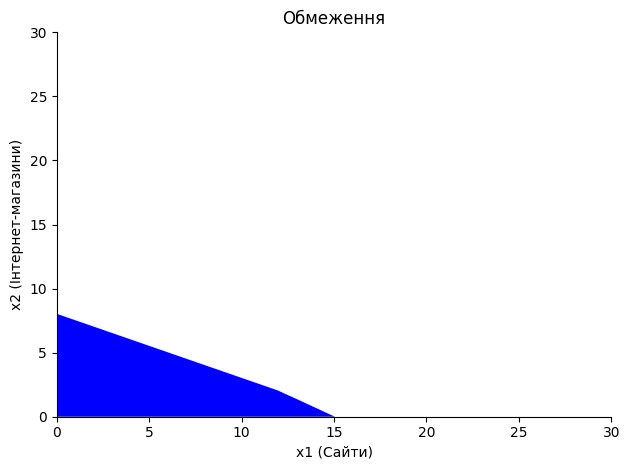

In [6]:
import sympy as sp

# Символьні змінні
x1, x2 = sp.symbols('x1 x2')

# Обмеження
constraint1 = 12 * x1 + 6 * x2 <= 320
constraint2 = 12 * x1 + 24 * x2 <= 192
constraint3 = 12 * x1 + 18 * x2 <= 180

# Побудова графіків
sp.plot_implicit(sp.And(constraint1, constraint2, constraint3), (x1, 0, 30), (x2, 0, 30),
                 show=True, title='Обмеження', xlabel='x1 (Сайти)', ylabel='x2 (Інтернет-магазини)')


In [3]:
pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 60.4 MB/s eta 0:00:00
